<a href="https://colab.research.google.com/github/AlissonRP/mestrado_docs/blob/master/CMP617/atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1

### Autor: Alisson Rosa


## Quantas palavras há no conjunto da obra?

* Informações:
  * Texto bruto: Sem processamento algum, texto de maneira bruta.
  * Texto Parcialmente Processado: Mantendo apenas letras, números e espaços porém com stop words, e duplicações, por exemplo NLP e nLP, serão considerados tokens distintos, ",", "!!" por exemplo foram removidos.

!python -m spacy download pt_core_news_sm
nltk.download('punkt_tab')

In [5]:
import pandas as pd
import requests
import spacy
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

nlp = spacy.load("pt_core_news_sm")
url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"


textos = requests.get(url).text

palavras = word_tokenize(textos, language='portuguese')

nlp.max_length = 3 * 11**8



doc = nlp(textos)





In [6]:
# Filtrar tokens: manter apenas letras, números e espaços
palavras_filtradas = [token.text for token in doc if not token.is_punct and not token.is_space]
quantidade_palavras = len(palavras_filtradas)

In [7]:
print(f"Quantidade de palavras no texto bruto: {len(palavras)}")

Quantidade de palavras no texto bruto: 635790


In [8]:
print(f"Quantidade de palavras no texto parcialmente processado é: {quantidade_palavras}")

Quantidade de palavras no texto parcialmente processado é: 554236







# Quais as 15 palavras mais frequentes (em ordem)?

In [37]:
from collections import Counter

top_15_words = Counter(palavras_filtradas).most_common(15)

print(f"15 palavras mais frequentes no texto parcialmente processado: {top_15_words}")

15 palavras mais frequentes no texto parcialmente processado: [('a', 20278), ('que', 19613), ('de', 17062), ('e', 15781), ('o', 13538), (';', 9621), ('nÃ£o', 8628), ('â\x80\x94', 7707), ('um', 5975), ('da', 5856), ('do', 5851), ('os', 4528), ('com', 4517), ('se', 4005), ('Ã©', 3995)]


In [36]:
from collections import Counter

top_15_words = Counter(palavras).most_common(15)

print(f"15 palavras mais frequentes no texto bruto: {top_15_words}")

15 palavras mais frequentes no texto bruto: [(',', 51532), ('.', 29209), ('a', 20278), ('que', 19613), ('de', 17062), ('e', 15781), ('o', 13538), (';', 9621), ('nÃ£o', 8628), ('â\x80\x94', 7707), ('um', 5975), ('da', 5856), ('do', 5851), ('os', 4528), ('com', 4517)]


Em uma primeira análise o texto bruto é está coerente que pré-processamento do `spacy`dessa maneira a partir desse momento a análise será realizada utilizado o texto bruto, porém removendo as vírgulas (",") e ponto final (".")

In [35]:
# Remover "." e "," do final das palavras e filtrar palavras vazias
palavras_filtradas = [re.sub(r"[.,]$", "", palavra) for palavra in palavras if not re.match(r"^[.,]$", palavra)]



# Qual o bigrama mais frequente?

In [38]:
from nltk import bigrams

top_bigram = Counter(list(bigrams(palavras_filtradas)))

print(f"BiGrama mais frequente: {top_bigram.most_common(1)}")

BiGrama mais frequente: [(('que', 'a'), 1404)]




# Quantas palavras distintas há no conjunto da obra?

In [39]:
distict_words = len(set(palavras_filtradas))

print(f"Palavras Distintas: {distict_words}")

Palavras Distintas: 36015




# Qual o número médio de palavras em uma sentença?

In [46]:
sents= nltk.sent_tokenize(textos, language='portuguese')
total_palavras_sent = [len(word_tokenize(sentenca)) for sentenca in sents]

print(f"Numero medio de palavras por sentença do texto bruto é: {np.mean(total_palavras_sent)}")

Numero medio de palavras por sentença do texto bruto é: 18.445024659123877


# Construa o gráfico da distribuição do número de palavras por sentença.

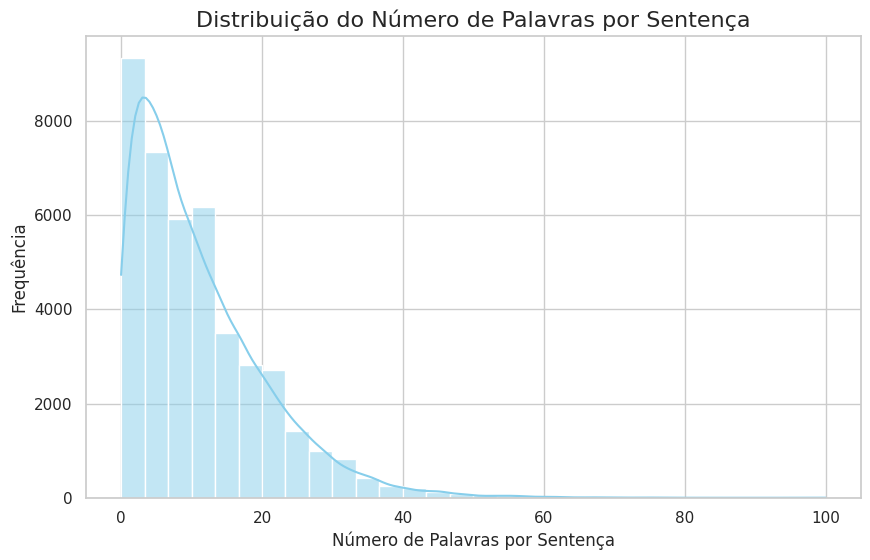

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(total_palavras_sent, kde=True, color="skyblue", bins=30)


plt.title('Distribuição do Número de Palavras por Sentença', fontsize=16)
plt.xlabel('Número de Palavras por Sentença', fontsize=12)
plt.ylabel('Frequência', fontsize=12)


plt.show()



# Mostre que a obra de Machado de Assis segue a Lei de Zipf. Construa o gráfico em escala logarítmica (log-log scale).

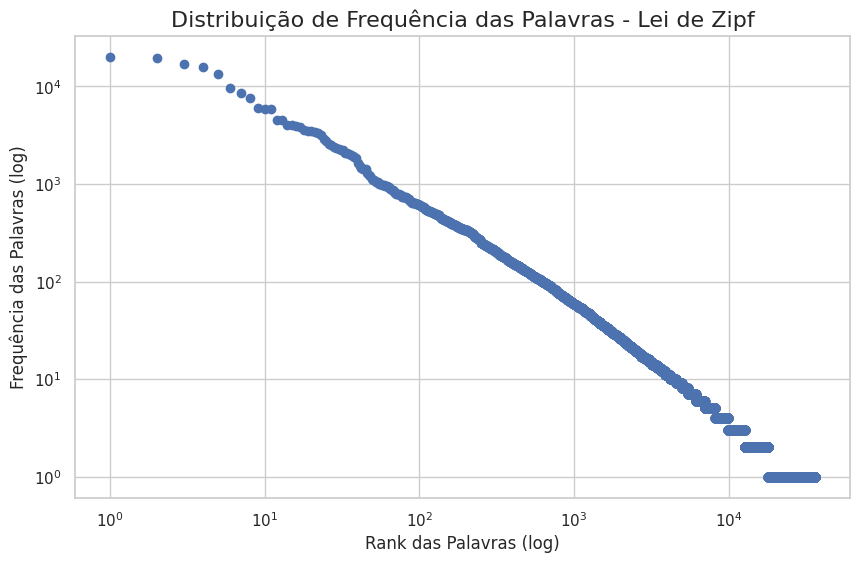

In [45]:
import numpy as np

contagem = Counter(palavras_filtradas)
frequencias = list(contagem.values())
frequencias.sort(reverse=True)

# Obter os ranks das palavras
ranks = np.arange(1, len(frequencias) + 1)


plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencias, marker='o', color='b', linestyle='None')


plt.title('Distribuição de Frequência das Palavras - Lei de Zipf', fontsize=16)
plt.xlabel('Rank das Palavras (log)', fontsize=12)
plt.ylabel('Frequência das Palavras (log)', fontsize=12)


plt.show()



# O que você analisou foi um corpus ou um conjunto de dados anotado (dataset)? Qual a diferença entre os dois?

R:Foi um corpus, pois não há pré-processamento (sem informações adicionais). O texto está em sua forma bruta, enquanto um dataset inclui informações adicionais associadas, como categorias semânticas, entidades, etc., o que não ocorre no material original.
